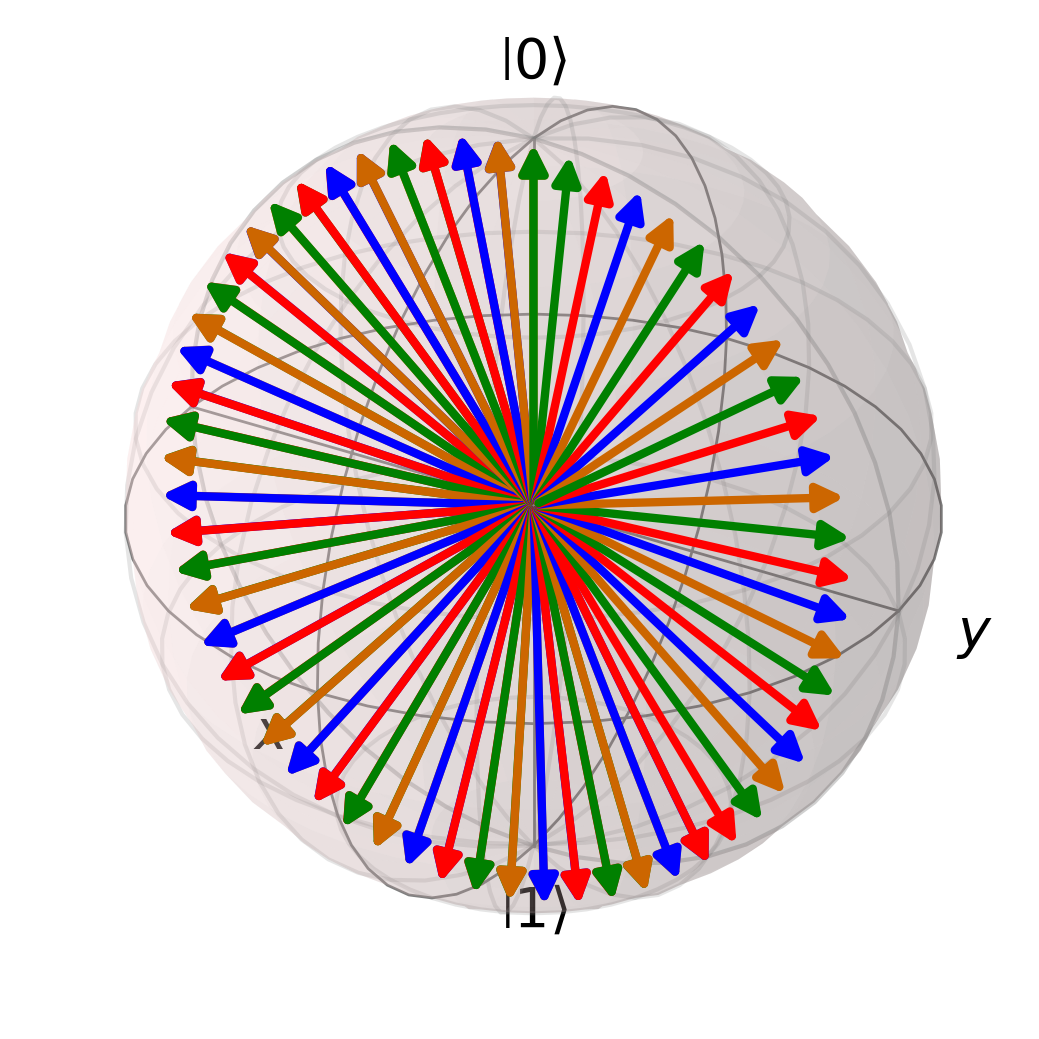

In [1]:
import numpy as np
from qutip import basis, mesolve, qeye, sigmax, sigmaz, Bloch, QobjEvo
%matplotlib qt

# Placeholder functions for Omega(t) and delta(t)
def Omega(t, args):
    # User-defined function for Omega
    # Example: return 1.0 for a constant Rabi frequency
    return 1.0

def delta(t, args):
    # User-defined function for delta
    # Example: return 0.2 for constant detuning
    return 0.2

# Define time vector
pulse_width = 5.0  # Pulse width (arbitrary units of time)
t = np.linspace(0, pulse_width, 100)  # Time from 0 to pulse width, with 100 points

# Initial state (e.g., ground state)
psi0 = basis(2, 0)

# Time-dependent Hamiltonian components
H0 = [sigmax(), Omega]  # Time-dependent Rabi frequency part
H1 = [sigmaz(), delta]  # Time-dependent detuning part

# Combine into a total Hamiltonian
H = [H0, H1]

# Initialize Bloch sphere
b = Bloch()

# Solve the time-dependent Schrödinger equation
result = mesolve(H, psi0, t, [], [], args={})

# Process each state at each time point for plotting on the Bloch sphere
for state in result.states:
    b.add_states(state)

# Show the Bloch sphere with the trajectory
b.show()


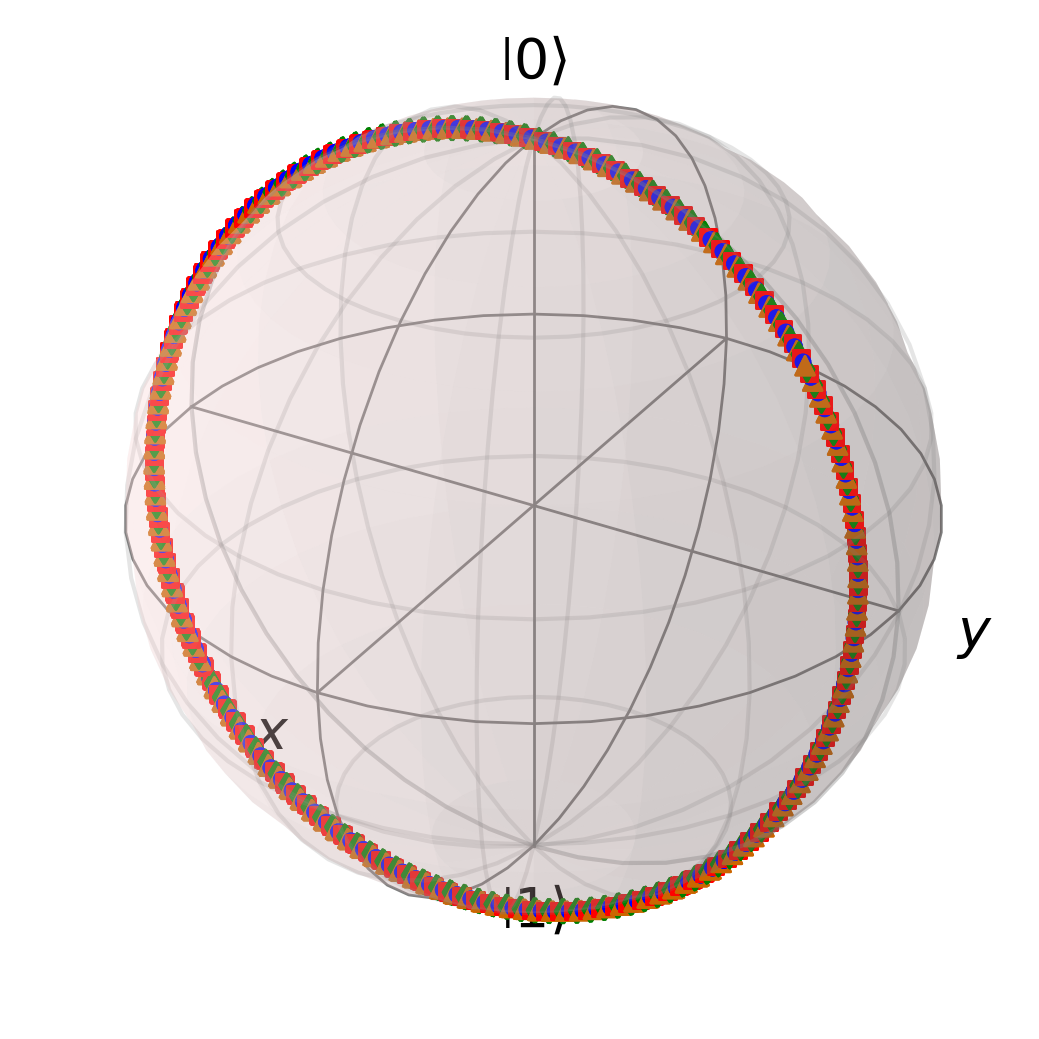

In [26]:
import numpy as np
from qutip import basis, mesolve, sigmax, sigmaz, Bloch, propagator
import matplotlib.pyplot as plt

# Define the time-dependent Rabi frequency and detuning as functions
def Omega(t, args=None):
    # Example: Constant Rabi frequency
    return 1

def delta(t, args=None):
    # Example: Constant detuning
    return 0.2

# Time vector
pulse_width = 5.0  # Pulse width
t = np.linspace(0, pulse_width, 1000)  # More points for smoother curves

# Hamiltonian with time-dependent coefficients
H = [[sigmax(), Omega], [sigmaz(), delta]]

# Initial state
psi0 = basis(2, 0)

# Solve the time-dependent Schrödinger equation
result = mesolve(H, psi0, t, [], [], args={})

# Calculate unitary propagator

U = propagator(H, 10, [])


# Calculate populations for the excited state (|1⟩)
populations = np.abs([psi[1][0][0] for psi in result.states])**2

# Evaluate Omega(t) and delta(t) over t for plotting
Omega_vals = np.array([Omega(ti, {}) for ti in t])
delta_vals = np.array([delta(ti, {}) for ti in t])

# Initialize Bloch sphere
b = Bloch()

# Process each state at each time point for plotting on the Bloch sphere
for state in result.states:
    b.add_states(state, kind='point')

# Show the Bloch sphere with the trajectory
b.show()

# Plotting populations and pulse shapes
fig, axes = plt.subplots(2, 1, figsize=(8, 10))

# Population plot
axes[0].plot(t, populations, label='Population in |1⟩')
axes[0].set_xlabel('Time')
axes[0].set_ylabel('Population')
axes[0].legend(loc='best')

# Pulse shapes
axes[1].plot(t, Omega_vals, label='$\Omega(t)$ (Rabi Frequency)')
axes[1].plot(t, delta_vals, label='$\delta(t)$ (Detuning)')
axes[1].set_xlabel('Time')
axes[1].set_ylabel('Pulse shape')
axes[1].legend(loc='best')

plt.tight_layout()
plt.show()


In [27]:
U

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = False
Qobj data =
[[-7.15629408e-01+0.13698323j -5.65930897e-17+0.68491616j]
 [ 5.65930897e-17+0.68491616j -7.15629408e-01-0.13698323j]]